# Регуляризация

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Регрессия

Допустим, у нас есть исходная известная зависимость 3-го порядка:

$$f(x) = 0.6 - 13.2x - 5.3 x^{2} - 4.17x^{3}.$$

Реализуем ее в виде python-функции и построим график.

In [2]:
import numpy as np

In [3]:
def f(x):
    return 0.4 + 2 * x + 0.8 * x ** 2 + 0.5 * x ** 3

In [4]:
X = np.linspace(-5, 5, 100)
y = f(X)

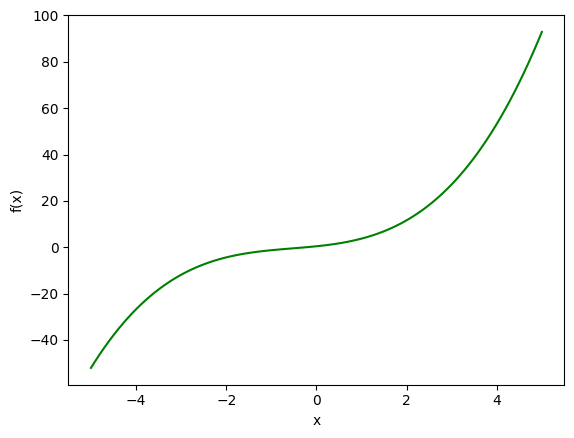

In [5]:
import matplotlib.pyplot as plt

plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g');

Теперь сгенерируем датасет из десяти случайных точек, подчиняющихся этой зависимости, с добавлением шума и нанесем на график.

In [6]:
np.random.seed(18)
x_train = np.random.uniform(-5, 5, 10)
y_train = f(x_train) + 10 * np.random.randn(10)

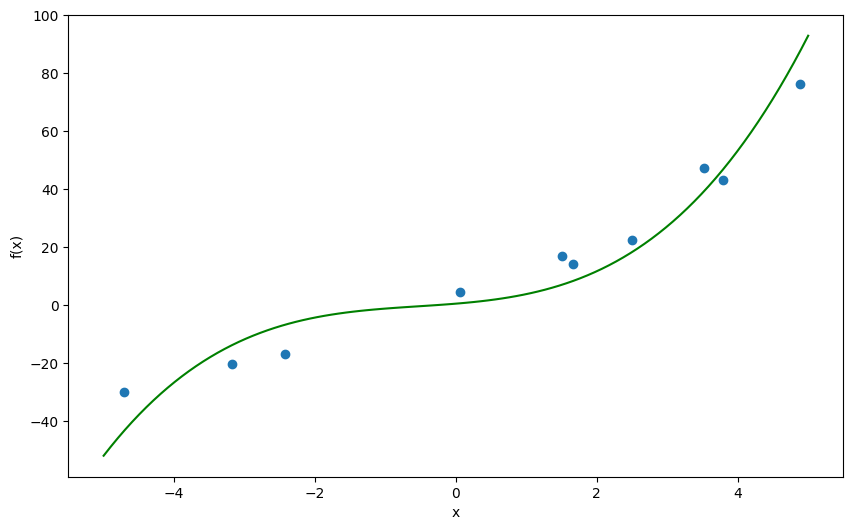

In [7]:
plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');

In [8]:
np.random.seed(8)
x_test = np.random.uniform(-5, 5, 10)
x_test = np.sort(x_test)
y_test = f(x_test)

X_test = x_test.reshape(-1, 1)
X_train = x_train.reshape(-1, 1)

X_train.shape

(10, 1)

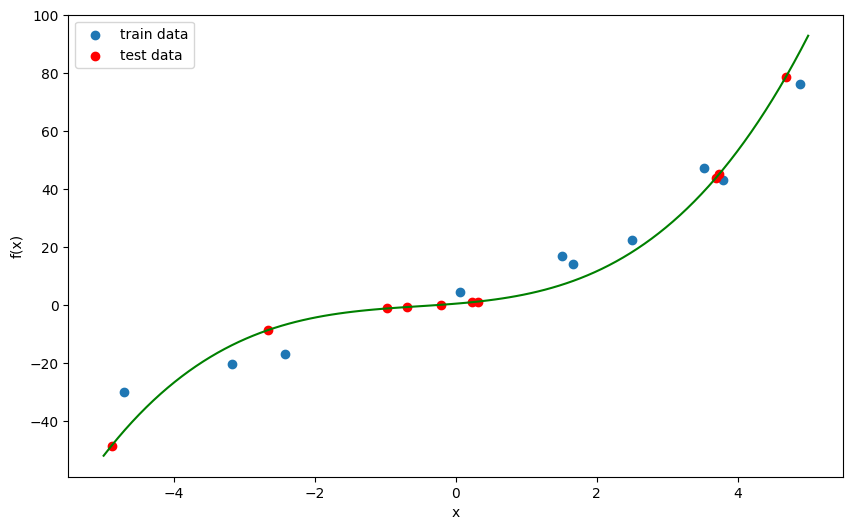

In [9]:
plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');
plt.scatter(x_test, y_test, label='test data', c='r')
plt.legend();

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(11, include_bias=False),
                     StandardScaler())

pipe.fit(X_train)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,11
,interaction_only,False
,include_bias,False
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [11]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

X_train

array([[ 0.24280024, -0.99361672, -0.09514354, -0.7935088 , -0.11704045,
        -0.65377906, -0.10644533, -0.5794457 , -0.1009462 , -0.53869339,
        -0.10204173],
       [-0.22897903, -1.2831795 , -0.15708267, -0.81953153, -0.1235608 ,
        -0.65623629, -0.10709649, -0.57968053, -0.1010101 , -0.53871595,
        -0.10204796],
       [ 0.98577727,  0.55438194,  0.83149569,  0.2261249 ,  0.5360912 ,
        -0.03034556,  0.3104915 , -0.2005174 ,  0.15876023, -0.30782378,
         0.05845399],
       [-1.28247793,  0.01438908, -0.74376567, -0.29804765, -0.40001917,
        -0.43580342, -0.23068805, -0.48537658, -0.15530466, -0.49816146,
        -0.1257384 ],
       [ 0.89993686,  0.30728335,  0.63899286, -0.03613738,  0.33622339,
        -0.25036765,  0.1448352 , -0.36686234,  0.03463997, -0.42654316,
        -0.02950314],
       [ 0.56756827, -0.4812904 ,  0.12801331, -0.62029612, -0.04052089,
        -0.60418099, -0.08415039, -0.56591537, -0.09477937, -0.53505703,
        -0.100

## Ridge (L2 регуляризация)

In [12]:
alphas = list(np.logspace(-7, 4, 10))
models = []
coefs = []

In [ ]:
alphas 

[np.float64(1e-07),
 np.float64(1.6681005372000591e-06),
 np.float64(2.782559402207126e-05),
 np.float64(0.0004641588833612782),
 np.float64(0.007742636826811277),
 np.float64(0.12915496650148853),
 np.float64(2.1544346900318865),
 np.float64(35.9381366380464),
 np.float64(599.4842503189421),
 np.float64(10000.0)]

In [14]:
from sklearn.linear_model import Ridge, LinearRegression

for alpha in alphas:
    m_r = Ridge(alpha=alpha).fit(X_train, y_train)
    models.append(m_r)
    coefs.append(m_r.coef_)

models.append(LinearRegression().fit(X_train, y_train))

SyntaxError: invalid syntax (__init__.py, line 51)

In [ ]:
len(models)

11

In [ ]:
len(coefs)

10

In [ ]:
coefs[0].shape

(11,)

### Визуализация предсказаний

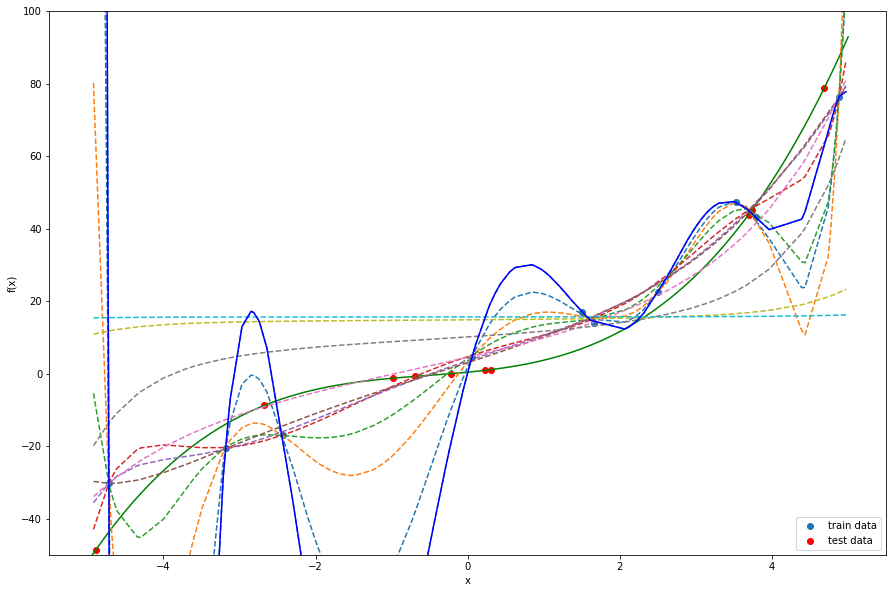

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');
plt.scatter(x_test, y_test, label='test data', c='r')
plt.legend()

x_t = np.sort(np.random.uniform(-5, 5, 100)).reshape(-1, 1)
X_t = pipe.transform(x_t)

for m in models:
    plt.plot(x_t, m.predict(X_t), '--')

plt.plot(x_t, models[-1].predict(X_t), 'b-')
plt.ylim(-50, 100);

In [ ]:
import pandas as pd

scores = pd.DataFrame()
scores = scores.append(
        {
            'alpha': 'no',
            'train_r2': models[-1].score(X_train, y_train),
            'test_r2': models[-1].score(X_test, y_test)
        }, ignore_index=True
    )

for i, m in enumerate(models[:-1]):
    alpha = alphas[i]
    scores = scores.append(
        {
            'alpha': alpha,
            'train_r2': m.score(X_train, y_train),
            'test_r2': m.score(X_test, y_test)
        }, ignore_index=True
    )


scores

,alpha,train_r2,test_r2
0,no,1.000000,-76.478993
1,0.0,0.999901,-18.170492
2,0.000002,0.999682,-0.349948
3,0.000028,0.998399,0.719186
4,0.000464,0.995018,0.956577
5,0.007743,0.993622,0.963986
6,0.129155,0.992731,0.954618
7,2.154435,0.970881,0.960356
8,35.938137,0.732147,0.720257
9,599.48425,0.142472,0.114558


### Визуализация весов

In [ ]:
coefs

[array([  149.8238576 ,  -188.61880162,  -638.45876489,  1329.80231047,
          955.35361249, -2215.00766652,  -159.53960494,    57.27586056,
          482.22294723,  1081.87557073,  -810.4256577 ]),
 array([  78.31410566,  -62.67152812, -339.25446742,  382.46790669,
         742.72170377, -431.55413298, -335.21023174, -382.42626281,
        -382.51457226,  510.87165297,  254.02881787]),
 array([  45.62849492,  -31.6193098 , -145.44957292,  172.34440858,
         368.74840902, -139.84811579, -204.13869274, -237.35682325,
        -251.07555874,  244.52828471,  213.1847012 ]),
 array([ 21.15973629, -11.37561335,  13.68268036,  50.3946268 ,
         16.09421097, -24.34974542, -44.37402771, -39.12186706,
        -25.95267197,  29.29724161,  50.99279805]),
 array([22.03232612, -3.01419069, 10.6719799 , 15.46258483, -1.59271275,
         0.11794318, -5.60510862, -5.22228425, -1.14986485, -1.14624965,
         6.95663351]),
 array([20.96601954,  1.26460612,  9.14300246,  3.76663401,  2.8007

In [ ]:
np.vstack(coefs).T

array([[ 1.49823858e+02,  7.83141057e+01,  4.56284949e+01,
         2.11597363e+01,  2.20323261e+01,  2.09660195e+01,
         1.49750038e+01,  4.26591103e+00,  4.73603858e-01,
         3.03610593e-02],
       [-1.88618802e+02, -6.26715281e+01, -3.16193098e+01,
        -1.13756134e+01, -3.01419069e+00,  1.26460612e+00,
         2.26184976e+00,  8.87314879e-01,  1.31114101e-01,
         8.74394708e-03],
       [-6.38458765e+02, -3.39254467e+02, -1.45449573e+02,
         1.36826804e+01,  1.06719799e+01,  9.14300246e+00,
         7.98551751e+00,  3.52717770e+00,  4.59046049e-01,
         2.98237041e-02],
       [ 1.32980231e+03,  3.82467907e+02,  1.72344409e+02,
         5.03946268e+01,  1.54625848e+01,  3.76663401e+00,
         1.94397342e+00,  7.91030097e-01,  1.31334026e-01,
         8.83262366e-03],
       [ 9.55353612e+02,  7.42721704e+02,  3.68748409e+02,
         1.60942110e+01, -1.59271275e+00,  2.80075149e+00,
         3.77953349e+00,  2.89988418e+00,  4.22648749e-01,
         2.

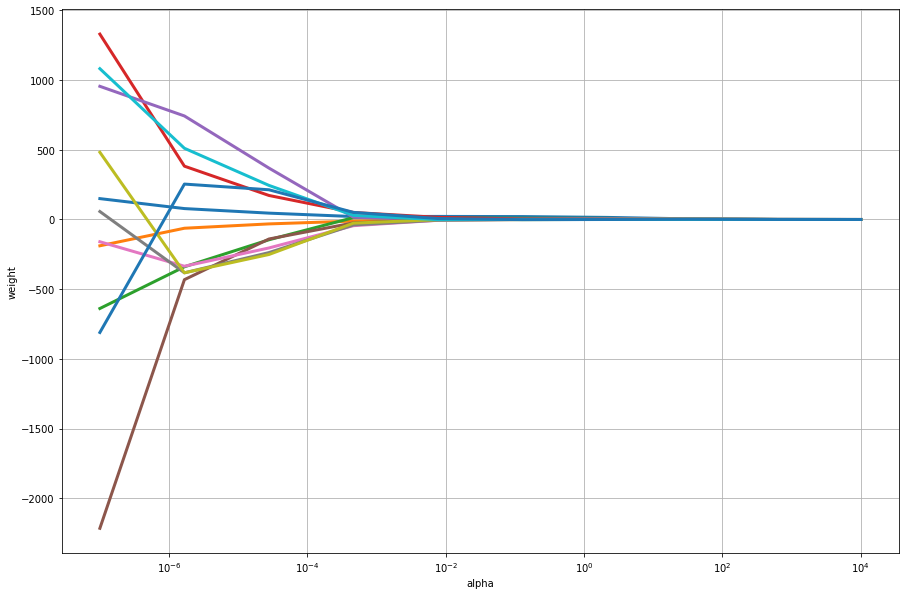

In [ ]:
plt.figure(figsize=(15, 10))

for i in np.vstack(coefs).T:
    plt.plot(alphas, i, linewidth=3)

plt.grid()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weight');